# 
Introduction
This notebook shows how to open and understand the dataset.
It also shows how to prepare the results submission.

You can run this script as a Python script or as a Jupyter notebook.

Requirements:

1. scikit-learn
2. numpy
3. pandas
4. matplotlib

# Load Data

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Dataset paths
DATASET_DIR = Path(r'C:\Users\dottorandi\Desktop\KHM\sssss\hyperview2\data\outputs')

HSI_AIRBORNE_DIR = DATASET_DIR / 'train' / 'hsi_airborne'
HSI_SATELLITE_DIR = DATASET_DIR / 'train' / 'hsi_satellite'
MSI_SATELLITE_TRAIN_DIR = DATASET_DIR / 'train' / 'msi_satellite'
MSI_SATELLITE_TEST_DIR = DATASET_DIR / 'test' / 'msi_satellite'
GT_TRAIN_CSV_PATH = DATASET_DIR / 'train_gt.csv'

print(DATASET_DIR)
print(HSI_AIRBORNE_DIR)

C:\Users\dottorandi\Desktop\KHM\sssss\hyperview2\data\outputs
C:\Users\dottorandi\Desktop\KHM\sssss\hyperview2\data\outputs\train\hsi_airborne


In [3]:
# Load the ground truth measurements
gt_train_df = pd.read_csv(GT_TRAIN_CSV_PATH)
gt_train_df.head()
column_names = ['Fe', 'Zn', 'B', 'Cu', 'S', 'Mn']

gt_train_df

,sample_index,B,Cu,Zn,Fe,S,Mn
0,0,0.8,2.1,5.0,186.6,12.078640,110.7
1,1,0.6,3.5,7.3,255.6,12.199673,75.7
2,2,0.5,2.1,2.3,204.0,65.882013,87.1
3,3,0.8,1.9,3.3,165.6,31.942712,56.0
4,4,0.5,2.4,5.8,419.9,35.970698,65.1
...,...,...,...,...,...,...,...
1871,1871,0.6,2.6,2.6,225.4,31.778477,99.9
1872,1872,0.5,2.4,3.0,204.2,30.832575,94.2
1873,1873,0.6,2.6,6.1,298.9,10.246492,64.3
1874,1874,0.8,1.8,6.0,184.6,10.098610,125.3


`gt_df` contains the ground truth measurements for the training dataset.
For each sample_index we have 6 ground-truth measurements: Fe, Zn, B, Cu, S, Mn.

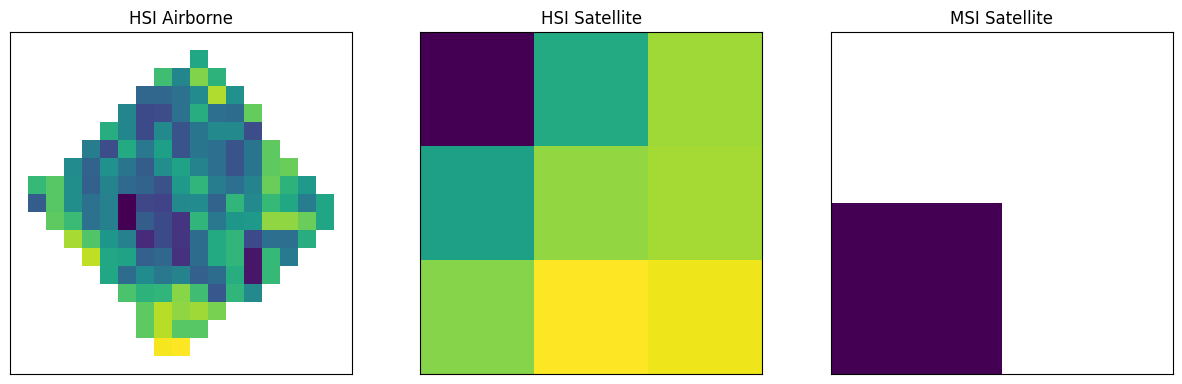

In [4]:
# Displaying example data
"""
# One field for a single multispectral band, for all 3 modalities.
"""

selected_index = 1
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
BAND_NUMBER = 7

# HSI airborne
with np.load(HSI_AIRBORNE_DIR / f'{selected_index:04}.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

    axs[0].imshow(arr[BAND_NUMBER, :, :])
    axs[0].set_title('HSI Airborne')
    axs[0].set_xticks([])
    axs[0].set_yticks([])

# HSI satellite
with np.load(HSI_SATELLITE_DIR / f'{selected_index:04}.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

    axs[1].imshow(arr[BAND_NUMBER, :, :].data)
    axs[1].set_title('HSI Satellite')
    axs[1].set_xticks([])
    axs[1].set_yticks([])

# MSI satellite
with np.load(MSI_SATELLITE_TRAIN_DIR / f'{selected_index:04}.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

    axs[2].imshow(arr[BAND_NUMBER, :, :])
    axs[2].set_title('MSI Satellite')
    axs[2].set_xticks([])
    axs[2].set_yticks([])

plt.show()

Text(0.5, 1.0, 'Spectral curve for a selected pixel')

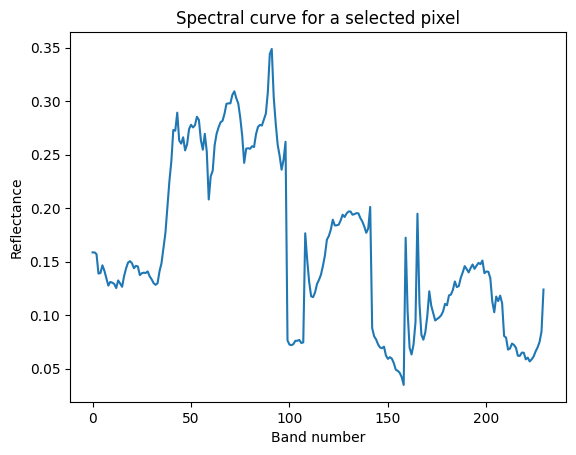

In [5]:
"""
# Displaying spectral curve for a selected field
"""
selected_index = 1

with np.load(HSI_SATELLITE_DIR / f'{selected_index:04}.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

pixel_0 = arr.data[:, 0, 0]

plt.plot(pixel_0)
plt.xlabel('Band number')
plt.ylabel('Reflectance')
plt.title('Spectral curve for a selected pixel')

In [6]:
"""
# Load data for satellite multispectral images
"""

def load_msi_data(directory):
    files = sorted(directory.glob('*.npz'))
    msi_data = []
    for file in enumerate(files):
        file_name = file[1]
        with np.load(file_name) as npz:
            arr = np.ma.MaskedArray(**npz)
            mean_pixel = np.mean(arr, axis=(1, 2))  # mean over all pixels
            msi_data.append(mean_pixel)

    msi_data = np.array(msi_data)
    return msi_data

def load_hsi_data(directory):
    files = sorted(directory.glob('*.npz'))
    hsi_data = []
    for file in enumerate(files):
        file_name = file[1]
        with np.load(file_name) as npz:
            arr = np.ma.MaskedArray(**npz)
            mean_pixel = np.mean(arr, axis=(1, 2))  # mean over all pixels
            hsi_data.append(mean_pixel)

    hsi_data = np.array(hsi_data)
    return hsi_data

print(f'Loading data from {MSI_SATELLITE_TRAIN_DIR} and {MSI_SATELLITE_TEST_DIR}')

# Load HSI data
#X_train_all = load_hsi_data(HSI_SATELLITE_DIR) 

# Load MSI data
X_train_all = load_msi_data(MSI_SATELLITE_TRAIN_DIR) 
X_test_all = load_msi_data(MSI_SATELLITE_TEST_DIR)

y_train_all = gt_train_df[column_names].values

print(f'X_train shape: {X_train_all.shape}')
print(f'Y_train shape: {y_train_all.shape}')
print(f'X_test shape: {X_test_all.shape}')

Loading data from C:\Users\dottorandi\Desktop\KHM\sssss\hyperview2\data\outputs\train\msi_satellite and C:\Users\dottorandi\Desktop\KHM\sssss\hyperview2\data\outputs\test\msi_satellite
X_train shape: (1876, 12)
Y_train shape: (1876, 6)
X_test shape: (1888, 12)


In [7]:
# %% [markdown]
"""
# Calculating the metric

Use part of the training data to train the model and the rest to calculate the metric.
"""
#70% training
X_train = X_train_all[:1300] 
y_train = y_train_all[:1300]

#30% testing
X_test = X_train_all[1300:]
y_test = y_train_all[1300:]

# Baseline Solution

In [8]:
"""
# Generating baseline solution

Baseline solution is used to calculate the performance of the final model.
"""

class BaselineRegressor:
    """
    Baseline regressor, which calculates the mean value of the target from the training
    data and returns it for each testing sample.
    """

    def __init__(self):
        self.mean = 0

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.mean = np.mean(y_train, axis=0)
        self.classes_count = y_train.shape[1]
        return self

    def predict(self, X_test: np.ndarray):
        return np.full((len(X_test), self.classes_count), self.mean)

In [9]:
# Fit the baseline model
baseline_reg = BaselineRegressor()
baseline_reg = baseline_reg.fit(X_train, y_train)
baseline_predictions = baseline_reg.predict(X_test)

# Generate baseline values to be used in score computation
baselines = np.mean((y_test - baseline_predictions) ** 2, axis=0)

In [10]:
# Generate predictions slightly different from baseline predictions
np.random.seed(0)
predictions = np.zeros_like(y_test)
for column_index in range(predictions.shape[1]):
    class_mean_value = baseline_reg.mean[column_index]
    predictions[:, column_index] = np.random.uniform(low=class_mean_value - class_mean_value * 0.2,
                                                     high=class_mean_value + class_mean_value * 0.2,
                                                     size=len(predictions))

# MSE

In [55]:
# Calculate MSE for each class
mse = np.mean((y_test - predictions) ** 2, axis=0)

# Calculate the score for each class individually
scores = mse / baselines

# Calculate the final score
final_score = np.mean(scores)

for score, class_name in zip(scores, column_names):
    print(f"Class {class_name} score: {score}")

print(f"Final score: {final_score}")

Class Fe score: 0.5153976409293745
Class Zn score: 0.5136901818690761
Class B score: 0.40265661282701526
Class Cu score: 0.6455033700781888
Class S score: 0.5928785004790271
Class Mn score: 0.5309127246272678
Final score: 0.5335065051349915


# Our Solution - Random Forest

## Setup

In [12]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [13]:
count_headers = X_train.shape[1] + 1

headersX = ["band" + str(i) for i in range(1, count_headers)]
headersY = ['Fe', 'Zn', 'B', 'Cu', 'S', 'Mn']

df_X_train = pd.DataFrame(X_train, columns = headersX)
df_y_train = pd.DataFrame(y_train, columns = headersY)

df_X_test = pd.DataFrame(X_test, columns = headersX)
df_y_test = pd.DataFrame(y_test, columns = headersY)

In [14]:
# Save the features dataframe to a csv file [override for colab check]
df_X_train.to_csv('df_X_train.csv', index=False)
df_y_train.to_csv('df_y_train.csv', index=False)

df_X_test.to_csv('df_X_test.csv', index=False)
df_y_test.to_csv('df_y_test.csv', index=False)

feature_list = df_X_train.columns

In [15]:
feature_list

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'band8',
       'band9', 'band10', 'band11', 'band12'],
      dtype='object')

In [16]:
df_X_train[-5:]

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12
1295,0.099987,0.134381,0.176187,0.220375,0.256944,0.273006,0.289587,0.295494,0.304925,0.321644,0.388269,0.344969
1296,0.064956,0.094369,0.134263,0.186175,0.211163,0.218700,0.236444,0.241106,0.248669,0.252956,0.335806,0.288081
1297,0.079640,0.113507,0.143227,0.191227,0.215240,0.224367,0.240287,0.251380,0.255933,0.258840,0.362173,0.331180
1298,0.073633,0.104287,0.135633,0.177947,0.197800,0.203933,0.219013,0.228313,0.233020,0.228487,0.320393,0.289940
1299,0.071773,0.101840,0.132140,0.175647,0.199780,0.208327,0.223800,0.234933,0.241987,0.242960,0.355700,0.317807


In [17]:
df_y_train[-5:]

,Fe,Zn,B,Cu,S,Mn
1295,173.5,8.5,1.2,2.8,25.698334,77.8
1296,191.3,3.2,0.9,2.5,36.948949,107.5
1297,177.1,6.3,1.0,2.7,25.998010,109.2
1298,189.9,2.6,0.8,2.1,96.809265,57.9
1299,235.8,9.1,1.2,2.9,39.340393,102.0


In [18]:
imp_features = feature_list
imp_features

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band6', 'band7', 'band8',
       'band9', 'band10', 'band11', 'band12'],
      dtype='object')

## Run

In [28]:
# Run Definitions

run_type = "all"
imp_threshold = 0.05

el_dict = {'Fe':'Iron', 'Zn':'Zinc', 'B':'Boron',
           'Cu':'Copper', 'S':'Sulfur', 'Mn':'Manganese'}

filename = run_type + "_" + ".png"

print(f"Run Type: {run_type}")

Run Type: all


In [29]:
import numpy as np

labels = np.array(df_y_train)
features = np.array(df_X_train)

test_labels = np.array(df_y_test)
test_features = np.array(df_X_test)

In [30]:
rf = RandomForestRegressor()
rf.fit(features, labels)

RandomForestRegressor()

In [31]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 8.28 degrees.


In [32]:
# Let's check which feature is important

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: band2                Importance: 0.27
Variable: band1                Importance: 0.21
Variable: band12               Importance: 0.09
Variable: band10               Importance: 0.07
Variable: band11               Importance: 0.07
Variable: band4                Importance: 0.05
Variable: band5                Importance: 0.05
Variable: band8                Importance: 0.05
Variable: band3                Importance: 0.04
Variable: band6                Importance: 0.04
Variable: band7                Importance: 0.04
Variable: band9                Importance: 0.04


In [33]:
# extract list of important variables

a = [feature_list, importances]
df = pd.DataFrame(a)
df = df.T
df.columns = ["band", "importances"]
df_sorted = df.sort_values(by="importances", ascending = False)
display(df_sorted)

,band,importances
1,band2,0.265549
0,band1,0.207715
11,band12,0.085474
9,band10,0.068909
10,band11,0.066951
3,band4,0.05069
4,band5,0.049734
7,band8,0.046824
2,band3,0.043826
5,band6,0.040002


In [34]:
# Sort the DataFrame by 'col1' in ascending order
#imp_threshold = 0.05
df_subset = df_sorted[df_sorted['importances'] > imp_threshold]
imp_features = list(df_subset['band'])
imp_features

['band2', 'band1', 'band12', 'band10', 'band11', 'band4']

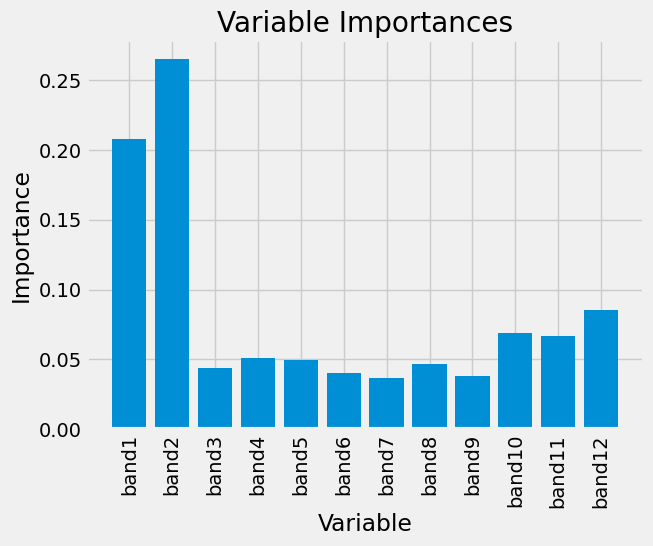

In [35]:
# Visualization of Feature Importance

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

plt.savefig(filename)

# Create New Submission

In [50]:
import pandas as pd
import numpy as np

test_row_count = len(test_features)
data_zero = np.zeros((test_row_count, 6))
df_submission = pd.DataFrame(data_zero, columns = headersY)
display(df_submission)

,Fe,Zn,B,Cu,S,Mn
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
571,0.0,0.0,0.0,0.0,0.0,0.0
572,0.0,0.0,0.0,0.0,0.0,0.0
573,0.0,0.0,0.0,0.0,0.0,0.0
574,0.0,0.0,0.0,0.0,0.0,0.0


## Pred2Sub

In [51]:
predictions

array([[206.394     ,   4.484     ,   0.784     ,   2.618     ,
         32.1265756 , 105.341     ],
       [150.692     ,   4.671     ,   1.163     ,   2.317     ,
         22.23716943,  93.544     ],
       [148.589     ,   5.363     ,   1.017     ,   2.252     ,
         24.50729746,  89.811     ],
       ...,
       [323.654     ,   7.319     ,   0.61      ,   2.616     ,
         15.55435031,  57.328     ],
       [224.767     ,   3.12      ,   0.563     ,   2.419     ,
         30.34258251,  98.574     ],
       [230.137     ,   4.33      ,   0.775     ,   2.699     ,
         34.5249161 , 101.824     ]])

In [52]:
# Save Predictions to a dataframe

pred_headers = headersY
    
new_prediction = pd.DataFrame(predictions, columns = pred_headers)

In [53]:
col_count = new_prediction.shape[1]

for col_idx in range(col_count):
    col_name = new_prediction.columns[col_idx]
    df_submission[col_name] = new_prediction[col_name]

In [54]:
predictions = np.array(df_submission)
predictions

array([[206.394     ,   4.484     ,   0.784     ,   2.618     ,
         32.1265756 , 105.341     ],
       [150.692     ,   4.671     ,   1.163     ,   2.317     ,
         22.23716943,  93.544     ],
       [148.589     ,   5.363     ,   1.017     ,   2.252     ,
         24.50729746,  89.811     ],
       ...,
       [323.654     ,   7.319     ,   0.61      ,   2.616     ,
         15.55435031,  57.328     ],
       [224.767     ,   3.12      ,   0.563     ,   2.419     ,
         30.34258251,  98.574     ],
       [230.137     ,   4.33      ,   0.775     ,   2.699     ,
         34.5249161 , 101.824     ]])

# Create Submission File

In [56]:
# %% [markdown]
"""
# Prepare the submission for test set
"""
rf_predictions_test = rf.predict(X_test_all)
submission = pd.DataFrame(data=rf_predictions_test, columns=column_names)
submission.to_csv("submission.csv", index_label="sample_index")